In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [75]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    "datasets/Train",
    image_size=(32,32),
    batch_size=1,
    shuffle=True,
    label_mode="int"
)

validation_ds = image_dataset_from_directory(
    "datasets/Validation",
    image_size=(32,32),
    batch_size=1,
    shuffle=False,
    label_mode="int"
)


Found 15413 files belonging to 42 classes.
Found 3164 files belonging to 42 classes.


In [76]:
class_name = train_ds.class_names
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y:(normalization_layer(x),y))
validation_ds = validation_ds.map(lambda x,y:(normalization_layer(x),y))

In [ ]:
# Retrieving the labels and splitting into train test images and labels
# X: image, y: label
X_train = []
y_train = []

for imgs,labels in train_ds:
    for img,label in zip(imgs,labels):
        X_train.append(img.numpy())
        y_train.append(label.numpy())

X_test = []
y_test = []

for imgs,labels in validation_ds:
    for img,label in zip(imgs,labels):
        X_test.append(img.numpy())
        y_test.append(label.numpy())

In [ ]:
# Normalizing the Pixels between 0 and 1

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train,X_test = X_train/255.0,X_test/255.0


In [59]:
y_train

[np.int32(19),
 np.int32(3),
 np.int32(4),
 np.int32(5),
 np.int32(9),
 np.int32(14),
 np.int32(19),
 np.int32(14),
 np.int32(19),
 np.int32(8),
 np.int32(40),
 np.int32(4),
 np.int32(9),
 np.int32(4),
 np.int32(9),
 np.int32(38),
 np.int32(17),
 np.int32(3),
 np.int32(7),
 np.int32(23),
 np.int32(3),
 np.int32(9),
 np.int32(3),
 np.int32(4),
 np.int32(10),
 np.int32(3),
 np.int32(10),
 np.int32(12),
 np.int32(13),
 np.int32(15),
 np.int32(8),
 np.int32(12),
 np.int32(19),
 np.int32(5),
 np.int32(19),
 np.int32(17),
 np.int32(17),
 np.int32(3),
 np.int32(17),
 np.int32(3),
 np.int32(9),
 np.int32(31),
 np.int32(23),
 np.int32(3),
 np.int32(19),
 np.int32(30),
 np.int32(19),
 np.int32(15),
 np.int32(19),
 np.int32(4),
 np.int32(13),
 np.int32(15),
 np.int32(3),
 np.int32(3),
 np.int32(19),
 np.int32(4),
 np.int32(12),
 np.int32(15),
 np.int32(19),
 np.int32(3),
 np.int32(17),
 np.int32(14),
 np.int32(5),
 np.int32(9),
 np.int32(30),
 np.int32(16),
 np.int32(5),
 np.int32(5),
 np.int32(9

In [43]:
X_train.shape

(15413, 32, 32, 3)

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 1 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

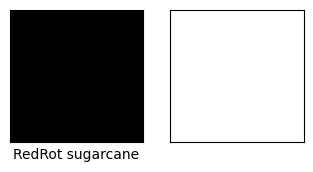

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.xlabel(class_name[labels[i]])

## Model Training

In [45]:
len(class_names)

42

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

model = Sequential()
#i/p layer
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
#o/p layer
model.add(Dense(len(class_name),activation="softmax"))

c:\Users\HP\OneDrive\Documents\UdyogAi\udyog\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 42)             │         2,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,498 (294.91 KB)

 Trainable params: 75,498 (294.91 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
len(validation_ds.class_names)

AttributeError: '_MapDataset' object has no attribute 'class_names'

In [81]:
#Compilation of Model
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

In [82]:
#Validating model
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


15413/15413 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - accuracy: 0.2766 - loss: 2.6639 - val_accuracy: 0.0398 - val_loss: 4.9868
Epoch 2/10
15413/15413 ━━━━━━━━━━━━━━━━━━━━ 56s 4ms/step - accuracy: 0.5162 - loss: 1.7554 - val_accuracy: 0.0218 - val_loss: 5.8565
Epoch 3/10
15413/15413 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - accuracy: 0.5967 - loss: 1.4617 - val_accuracy: 0.0326 - val_loss: 6.5344
Epoch 4/10
15413/15413 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.6427 - loss: 1.3063 - val_accuracy: 0.0351 - val_loss: 7.4237
Epoch 5/10
15413/15413 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.6785 - loss: 1.1735 - val_accuracy: 0.0360 - val_loss: 8.1321
Epoch 6/10
 7277/15413 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.6935 - loss: 1.1178

KeyboardInterrupt: 

In [40]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)
print("Unique classes:", np.unique(y_train))


X_train shape: (15413, 32, 32, 3)


AttributeError: 'list' object has no attribute 'shape'

Class names: ['American Bollworm on Cotton', 'Anthracnose on Cotton', 'Army worm', 'Becterial Blight in Rice', 'Brownspot', 'Common_Rust', 'Cotton Aphid', 'Flag Smut', 'Gray_Leaf_Spot', 'Healthy Maize', 'Healthy Wheat', 'Healthy cotton', 'Leaf Curl', 'Leaf smut', 'Mosaic sugarcane', 'RedRot sugarcane', 'RedRust sugarcane', 'Rice Blast', 'Sugarcane Healthy', 'Tungro', 'Wheat Brown leaf Rust', 'Wheat Stem fly', 'Wheat aphid', 'Wheat black rust', 'Wheat leaf blight', 'Wheat mite', 'Wheat powdery mildew', 'Wheat scab', 'Wheat___Yellow_Rust', 'Wilt', 'Yellow Rust Sugarcane', 'bacterial_blight in Cotton', 'bollrot on Cotton', 'bollworm on Cotton', 'cotton mealy bug', 'cotton whitefly', 'maize ear rot', 'maize fall armyworm', 'maize stem borer', 'pink bollworm in cotton', 'red cotton bug', 'thirps on  cotton']
y_train sample: [29 15 17  3 37  3 12 26  4  8]


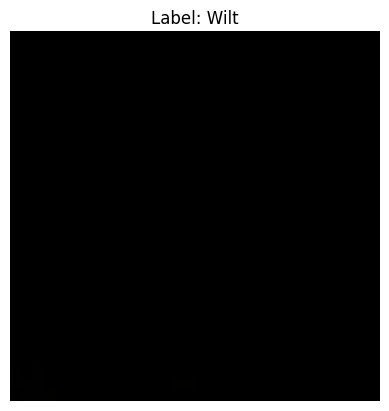

In [53]:
print("Class names:", class_names)
print("y_train sample:", y_train[:10])
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.title(f"Label: {class_names[y_train[0]]}")
plt.axis('off')
plt.show()
